<a href="https://colab.research.google.com/github/CintiaCNC/PDI/blob/main/tp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


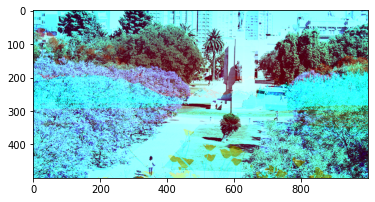

In [ ]:
# YIQ suma promedio


import numpy as np
import imageio
import matplotlib.pyplot as plt

A=imageio.imread('image1.png')/255
B=imageio.imread('image2.png')/255
C = A + B
yA=np.zeros(A.shape)
yA[:,:,0] = 0.229*A[:,:,0] + 0.587*A[:,:,1] + 0.114*A[:,:,2]
yA[:,:,1] = 0.595716*A[:,:,0] - 0.274453*A[:,:,1] - 0.321263*A[:,:,2]
yA[:,:,2] = 0.211456*A[:,:,0] - 0.522591*A[:,:,1] + 0.311135*A[:,:,2]

yB=np.zeros(B.shape)
yB[:,:,0] = 0.229*B[:,:,0] + 0.587*B[:,:,1] + 0.114*B[:,:,2]
yB[:,:,1] = 0.595716*B[:,:,0] - 0.274453*B[:,:,1] - 0.321263*B[:,:,2]
yB[:,:,2] = 0.211456*B[:,:,0] - 0.522591*B[:,:,1] + 0.311135*B[:,:,2]

yC= np.zeros(C.shape)

# YC := (YA + YB) / 2;
yC[:,:,0]=(yA[:,:,0]+ yB[:,:,0])/2

# IC := (YA * IA + YB * IB) / (YA + YB) ;
yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

# QC := (YA * QA + YB * QB) / (YA + YB) ;
yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])

plt.figure(1)
plt.imshow(yC)
plt.show()

In [ ]:
# RGB promedio

import numpy as np
import imageio
import matplotlib.pyplot as plt 

A=imageio.imread('image1.png')/255
B=imageio.imread('image2.png')/255
C = A+B
yA=np.zeros(A.shape)
yA[:,:,0] = A[:,:,0]
yA[:,:,1] = A[:,:,1]
yA[:,:,2] = A[:,:,2]

yB=np.zeros(B.shape)
yB[:,:,0] = B[:,:,0]
yB[:,:,1] = B[:,:,1] 
yB[:,:,2] = B[:,:,2] 
yC= np.zeros(C.shape)

# YC := (YA + YB) / 2;
yC[:,:,0]=(yA[:,:,0]+ yB[:,:,0])/2

# IC := (YA * IA + YB * IB) / (YA + YB) ;
yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

# QC := (YA * QA + YB * QB) / (YA + YB) ;
yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])


plt.figure(2)
plt.imshow(yC)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide


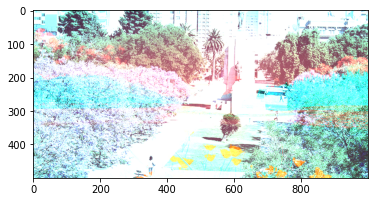

In [ ]:
# RGB CLAMPEADA
from numpy.ma.core import resize
import numpy as np
import imageio
import matplotlib.pyplot as plt

A=imageio.imread('image1.png')/255
B=imageio.imread('image2.png')/255
C = A+B
yA=np.zeros(A.shape)
yA[:,:,0] = A[:,:,0]
yA[:,:,1] = A[:,:,1]
yA[:,:,2] = A[:,:,2]

yB=np.zeros(B.shape)
yB[:,:,0] = B[:,:,0]
yB[:,:,1] = B[:,:,1] 
yB[:,:,2] = B[:,:,2] 

yC=np.zeros(C.shape)

# YC := YA + YB;
#   If YC > 1 then 
#   YC:=1; {suma clampeada}

yC[:,:,0]= A[:,:,0]+ B[:,:,0]
yC[:,:,0] = np.clip(yC[:,:,0], a_min=0, a_max=1)


# IC := (YA * IA + YB * IB) / (YA + YB) ;
yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

# QC := (YA * QA + YB * QB) / (YA + YB) ;
yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])


plt.figure(2)
plt.imshow(yC)
plt.show()

In [ ]:
# YIQ CLAMPEADA

import numpy as np
import imageio
import matplotlib.pyplot as plt

A=imageio.imread('image1.png')/255
B=imageio.imread('image2.png')/255
C = A + B
yA=np.zeros(A.shape)
yA[:,:,0] = 0.229*A[:,:,0] + 0.587*A[:,:,1] + 0.114*A[:,:,2]
yA[:,:,1] = 0.595716*A[:,:,0] - 0.274453*A[:,:,1] - 0.321263*A[:,:,2]
yA[:,:,2] = 0.211456*A[:,:,0] - 0.522591*A[:,:,1] + 0.311135*A[:,:,2]

yB=np.zeros(B.shape)
yB[:,:,0] = 0.229*B[:,:,0] + 0.587*B[:,:,1] + 0.114*B[:,:,2]
yB[:,:,1] = 0.595716*B[:,:,0] - 0.274453*B[:,:,1] - 0.321263*B[:,:,2]
yB[:,:,2] = 0.211456*B[:,:,0] - 0.522591*B[:,:,1] + 0.311135*B[:,:,2]

yC= np.zeros(C.shape)

# YC := YA + YB;
#   If YC > 1 then 
#   YC:=1; {suma clampeada}

yC[:,:,0]= A[:,:,0]+ B[:,:,0]
yC[:,:,0] = np.clip(yC[:,:,0], a_min=0, a_max=255)
print(yC)

# IC := (YA * IA + YB * IB) / (YA + YB) ;
yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

# QC := (YA * QA + YB * QB) / (YA + YB) ;
yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])


plt.figure(4)
plt.imshow(yC)
plt.show()

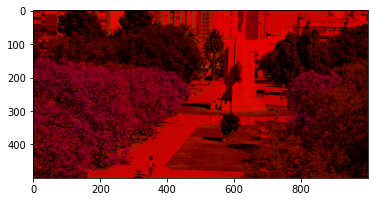

In [ ]:
# If ligther

import numpy as np 
import matplotlib.pyplot as plt
A=imageio.imread('image1.png')/255
B=imageio.imread('image2.png')/255
C = A + B

yA=np.zeros(A.shape)
yA[:,:,0] = 0.229*A[:,:,0] + 0.587*A[:,:,1] + 0.114*A[:,:,2]
yA[:,:,1] = 0.595716*A[:,:,0] - 0.274453*A[:,:,1] - 0.321263*A[:,:,2]
yA[:,:,2] = 0.211456*A[:,:,0] - 0.522591*A[:,:,1] + 0.311135*A[:,:,2]

yB=np.zeros(B.shape)
yB[:,:,0] = 0.229*B[:,:,0] + 0.587*B[:,:,1] + 0.114*B[:,:,2]
yB[:,:,1] = 0.595716*B[:,:,0] - 0.274453*B[:,:,1] - 0.321263*B[:,:,2]
yB[:,:,2] = 0.211456*B[:,:,0] - 0.522591*B[:,:,1] + 0.311135*B[:,:,2]
  
yC=np.zeros(C.shape) 
yC[:,:,0]=0.229*C[:,:,0]+0.587*C[:,:,1]+0.114*C[:,:,2]
yC[:,:,1]=0.595716*C[:,:,0]-0.274453*C[:,:,1]-0.321263*C[:,:,2]
yC[:,:,2]=0.211456*C[:,:,0]-0.522591*C[:,:,1]+0.311135*C[:,:,2]
  
  
h=yA[:,:,0] > yB[:,:,0]
bandera=np.all(h == True)
if bandera==True:
   yC[:,:,0]= yA[:,:,0]
   yC[:,:,1]= yA[:,:,1]
   yC[:,:,2]= yA[:,:,2]
else:        
  yC[:,:,0]= yB[:,:,0]        
  yC[:,:,1]= yB[:,:,1]      
  yC[:,:,2]= yB[:,:,2]



plt.figure(5)
plt.imshow(yC)
plt.show()

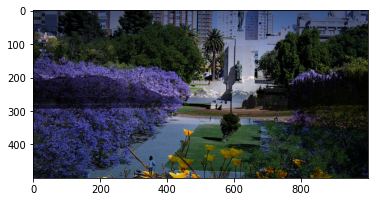

In [ ]:
# multiplicar imagenes 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
img1 = Image.open('image1.png')
img2 = Image.open('image2.png')
img3 = ImageChops.multiply(img1,img2)
plt.figure(6)
plt.imshow(img3)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


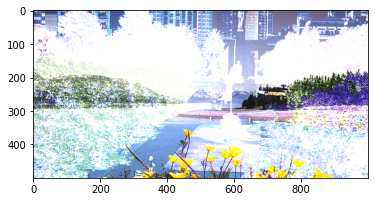

In [ ]:
# DIVISION DE IMAGENES RGB

import numpy as np
import imageio
import matplotlib.pyplot as plt

B=imageio.imread('image2.png')
A=imageio.imread('image1.png')
C = A+B
yA=np.zeros(A.shape)
yA[:,:,0] = A[:,:,0] 
yA[:,:,1] = A[:,:,1]
yA[:,:,2] = A[:,:,2] 

yB=np.zeros(B.shape)
yB[:,:,0] = B[:,:,0] 
yB[:,:,1] = B[:,:,1] 
yB[:,:,2] = B[:,:,2] 

yC= np.zeros(C.shape)

yC[:,:,0] = ( yA[:,:,0] / yB[:,:,0] )
yC[:,:,1] = ( yA[:,:,1] / yB[:,:,1] )
yC[:,:,2] = ( yA[:,:,2] / yB[:,:,2] )

plt.figure(8)
plt.imshow(yC)
plt.show()